# Task 1: Data Exploration and Preprocessing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Rony\Downloads\Dataset .csv') 

## 1. Identify the Number of Rows and Columns

In [2]:
data_info = {
    "shape": df.shape, "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum().to_dict(), "data_types": df.dtypes.to_dict()
}

In [3]:
data_info

{'shape': (9551, 21),
 'columns': ['Restaurant ID',
  'Restaurant Name',
  'Country Code',
  'City',
  'Address',
  'Locality',
  'Locality Verbose',
  'Longitude',
  'Latitude',
  'Cuisines',
  'Average Cost for two',
  'Currency',
  'Has Table booking',
  'Has Online delivery',
  'Is delivering now',
  'Switch to order menu',
  'Price range',
  'Aggregate rating',
  'Rating color',
  'Rating text',
  'Votes'],
 'missing_values': {'Restaurant ID': 0,
  'Restaurant Name': 0,
  'Country Code': 0,
  'City': 0,
  'Address': 0,
  'Locality': 0,
  'Locality Verbose': 0,
  'Longitude': 0,
  'Latitude': 0,
  'Cuisines': 9,
  'Average Cost for two': 0,
  'Currency': 0,
  'Has Table booking': 0,
  'Has Online delivery': 0,
  'Is delivering now': 0,
  'Switch to order menu': 0,
  'Price range': 0,
  'Aggregate rating': 0,
  'Rating color': 0,
  'Rating text': 0,
  'Votes': 0},
 'data_types': {'Restaurant ID': dtype('int64'),
  'Restaurant Name': dtype('O'),
  'Country Code': dtype('int64'),
  'C

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 2. Check for Missing Values in Each Column

In [5]:
# Check for missing values
missing_values = df.isnull().sum()  # This line will now work correctly
print('Missing values in each column:\n', missing_values)

# Example of handling missing values by filling with mean
df.fillna(df.mean(), inplace=True)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\Rony\AppData\Local\Temp\ipykernel_18156\1505267079.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## 3. Perform Data Type Conversion if Necessary

In [6]:
print('Data types before conversion:\n', df.dtypes)


if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
else:
    print("Column 'date_column' does not exist in the DataFrame.")


Data types before conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Column 'date_column' does not exist in the DataFrame.


In [7]:
# Step 1: Handle missing values in the 'Cuisines' column
# Fill missing values with "Unknown"
df['Cuisines'].fillna("Unknown", inplace=True)

In [8]:
# Step 2: Convert binary object columns to numeric
binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

## 4. Analyze the Distribution of the Target Variable

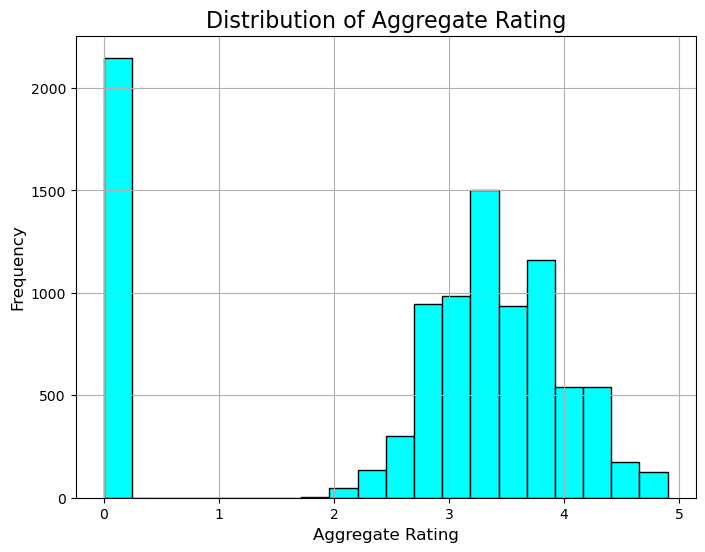

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

In [9]:
plt.figure(figsize=(8, 6))
df['Aggregate rating'].hist(bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Aggregate Rating', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

aggregate_rating_summary = df['Aggregate rating'].describe()
aggregate_rating_summary